In [1]:
import torch 
from dataset import CardioDataset
import os 
from matplotlib import pyplot as plt
import torchvision.transforms as T

root = '/Volumes/cardio-project/cardio/SPUM/CVD_detection_code'
cd = CardioDataset(os.path.join(root,'Data_CVD/data_CNN'),annotations_file_path = os.path.join(root,'Data_CVD/data_CNN_ATT/annotated_box_MI'),
                                transform =None,to_tensor=True,norm=False )

In [2]:
import pandas as pd 
df = pd.read_pickle(os.path.join(root,'Data_CVD/data_CNN_ATT/annotated_box_MI'))
df.loc[df.target == 1]

,img_id,path_img,target,patient,segment,color,view,aug
62,img_62.jpg,/data/cardio/SPUM/Labelling_EPFL_CHUV/Farhang ...,1,patient2,LAD,green,1,no
144,img_144.jpg,/data/cardio/SPUM/Labelling_EPFL_CHUV/Farhang ...,1,patient2,LAD,blue,1,no
227,img_227.jpg,/data/cardio/SPUM/Labelling_EPFL_CHUV/Farhang ...,1,patient2,LAD,green,2,no
311,img_311.jpg,/data/cardio/SPUM/Labelling_EPFL_CHUV/Farhang ...,1,patient2,LAD,green,3,no
399,img_399.jpg,/data/cardio/SPUM/Labelling_EPFL_CHUV/Farhang ...,1,patient3,LAD,green,1,no
...,...,...,...,...,...,...,...,...
12136,img_12136.jpg,/data/cardio/SPUM/Labelling_EPFL_CHUV/Farhang ...,1,patient51,RCA,brown,1,no
12217,img_12217.jpg,/data/cardio/SPUM/Labelling_EPFL_CHUV/Farhang ...,1,patient51,RCA,magenta_dark,1,no
12313,img_12313.jpg,/data/cardio/SPUM/Labelling_EPFL_CHUV/Farhang ...,1,patient52,LCX,brown,1,no
12426,img_12426.jpg,/data/cardio/SPUM/Labelling_EPFL_CHUV/Farhang ...,1,patient54,LCX,magenta_dark,1,no


1
torch.Size([1, 1500, 1500])
tensor(-0.2498, dtype=torch.float64)


IndexError: index 1 is out of bounds for dimension 0 with size 1

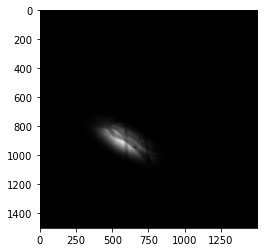

<Figure size 432x288 with 0 Axes>

In [12]:
from dataset import CardioDataset
import numpy as np
import torch 
from matplotlib import pyplot as plt
import torchvision.transforms as T
transform = T.Compose([T.RandomHorizontalFlip(0.5) , T.RandomVerticalFlip(0.5), T.RandomAdjustSharpness(sharpness_factor=2,p=0.5)])
import pandas as pd
root = '/Volumes/cardio-project/cardio/SPUM/CVD_detection_code'
df = pd.read_pickle(os.path.join(root,'Data_CVD/data_CNN_ATT/annotated_box_MI'))
df.loc[df.target == 1]

cd = CardioDataset(os.path.join(root,'Data_CVD/data_CNN_ATT'),annotations_img_id = df.loc[df.target == 1].img_id.values,annotations_file_path = os.path.join(root,'Data_CVD/data_CNN_ATT/annotated_box_MI'),
                                transform = True, to_tensor=True, norm=True,norm_imgnet= False, apply_attention= True )

img , label = cd[62]
print(label)
print(img.shape)
print(img[0].max()) # 242



"""
plt.figure()
plt.imshow(img[:,:,0],cmap = 'gray')
plt.figure()
plt.imshow(img[:,:,1],cmap='gray')
plt.figure()
plt.imshow(img[:,:,0]*(img[:,:,1]/255),cmap= 'gray')
"""
plt.figure()
plt.imshow(img[0],cmap = 'gray')
plt.figure()
plt.imshow(img[1],cmap='gray')
plt.figure()
plt.imshow(img[0]*(img[1]/255),cmap= 'gray')
"""

plt.figure()
plt.imshow(np.zeros((225,225)),cmap='gray')
plt.figure()
plt.imshow(img,cmap='gray')
plt.figure()
plt.imshow(img.permute(1, 2, 0),cmap='gray')
"""
plt.figure()
plt.imshow(torch.cat((img,img,img),dim=0).permute(1, 2, 0))
plt.figure()
plt.imshow(torch.cat((img,img,img),dim=0).permute(1, 2, 0))

